# Phagesdb Download Code
### Code using phagesdb web api to download json descriptions

In [2]:
import requests 
import json 

In [3]:
def url_to_json(url):
    r = requests.get(url)
    return r.json()

def make_page_url(page=None, page_size=None):
    if page is None and page_size is None:
        return "https://phagesdb.org/api/phages/"
    elif page is None:
        return "https://phagesdb.org/api/phages/?page_size={}".format(page_size)
    elif page_size is None:
        return "https://phagesdb.org/api/phages/?page={}".format(page)
    return "https://phagesdb.org/api/phages/?page={}&page_size={}".format(page, page_size)

def download_page(page=None, page_size=None):
    url = make_page_url(page=page, page_size=page_size)
    return url_to_json(url)

def download_phage_info(phage_name):
    url = "https://phagesdb.org/api/phages/{}/".format(phage_name)
    return url_to_json(url)  

def download_sequenced_phages(page, page_size):
    #keep page = 1 and make page_size huge so can download in one go (unless memory is an issue)
    url = "https://phagesdb.org/api/sequenced_phages/?page={}&page_size={}".format(page, page_size)
    return url_to_json(url)

In [4]:
phages_download = download_sequenced_phages(1, 10000)

In [5]:
phages = phages_download['results']
print("downloaded {}/{} phages".format(len(phages), phages_download['count']))
print(phages[0])

downloaded 3499/3499 phages
{'phage_name': '20ES', 'old_names': '', 'program': None, 'naming_notes': '', 'finder_name': 'Franceschelli,J.J., Suarez,C.A., Teran,L., Raya,R.', 'found_city': '', 'found_state': '', 'found_country': 'Argentina', 'found_GPS_lat': '', 'found_GPS_long': '', 'found_year': 2014, 'p_institution': {'institution_code': 'UNDR', 'institution_name': 'Universidad Nacional de Rosario', 'institution_logo': 'https://phagesdb.org/media/institutions/UNR-escudo-1.jpg', 'institution_url': 'http://www.unr.edu.ar/english/'}, 'enriched_sample': None, 'discovery_notes': '', 'isolation_temperature': None, 'growth_notes': '', 'pcluster': {'cluster': 'A', 'temperate': True}, 'psubcluster': {'subcluster': 'A2'}, 'morphotype': 'SIPHO', 'plaque_notes': '', 'lysogeny_notes': '', 'seq_finished': True, 'date_finished': '2014-06-18', 'seq_facility': {'short_name': 'INDEAR', 'facility_name': 'Instituto de Agrobiotecnologia de Rosario', 'contact_person': '', 'shipping_address': '', 'facility

# Examine some of the generals statistics from the data

In [6]:
import matplotlib.pyplot as plt
import statistics

def get_cohort_statistics(cohort):
    stats = ['genome_length', 'gcpercent', 'overhang_length']
    stat_samples = [[dicc[ss] for ss in stats] for dicc in cohort]
    stat_samples = list(zip(*stat_samples))
    
    plt.figure(figsize=(30, 10))
    for ii, ss in enumerate(stat_samples):
        ss_rem0 = [float(s) for s in ss if s is not None]
        ss_mean = statistics.mean(ss_rem0)
        ss_stdev = statistics.stdev(ss_rem0)
        print("{} - Mean: {}, STD: {}, Max: {}, Min:{}".format(stats[ii], ss_mean, ss_stdev, max(ss_rem0), min(ss_rem0)))

        plt.subplot(1, 3, ii+1) 
        plt.title(stats[ii]+" frequency")
        plt.xlabel(stats[ii]+" bins")
        plt.ylabel("occurances")

        if stats[ii] == 'overhang_length':
            plt.hist(ss_rem0, bins = 20, range=(min(ss_rem0), 25))
        else:
            plt.hist(ss_rem0, bins = 20)


genome_length - Mean: 61616.20320091455, STD: 27642.254625720645, Max: 191968.0, Min:14270.0
gcpercent - Mean: 63.328436696198914, STD: 4.553294114415972, Max: 72.7, Min:41.2
overhang_length - Mean: 47.10809628008753, STD: 1450.0569286940722, Max: 68341.0, Min:4.0


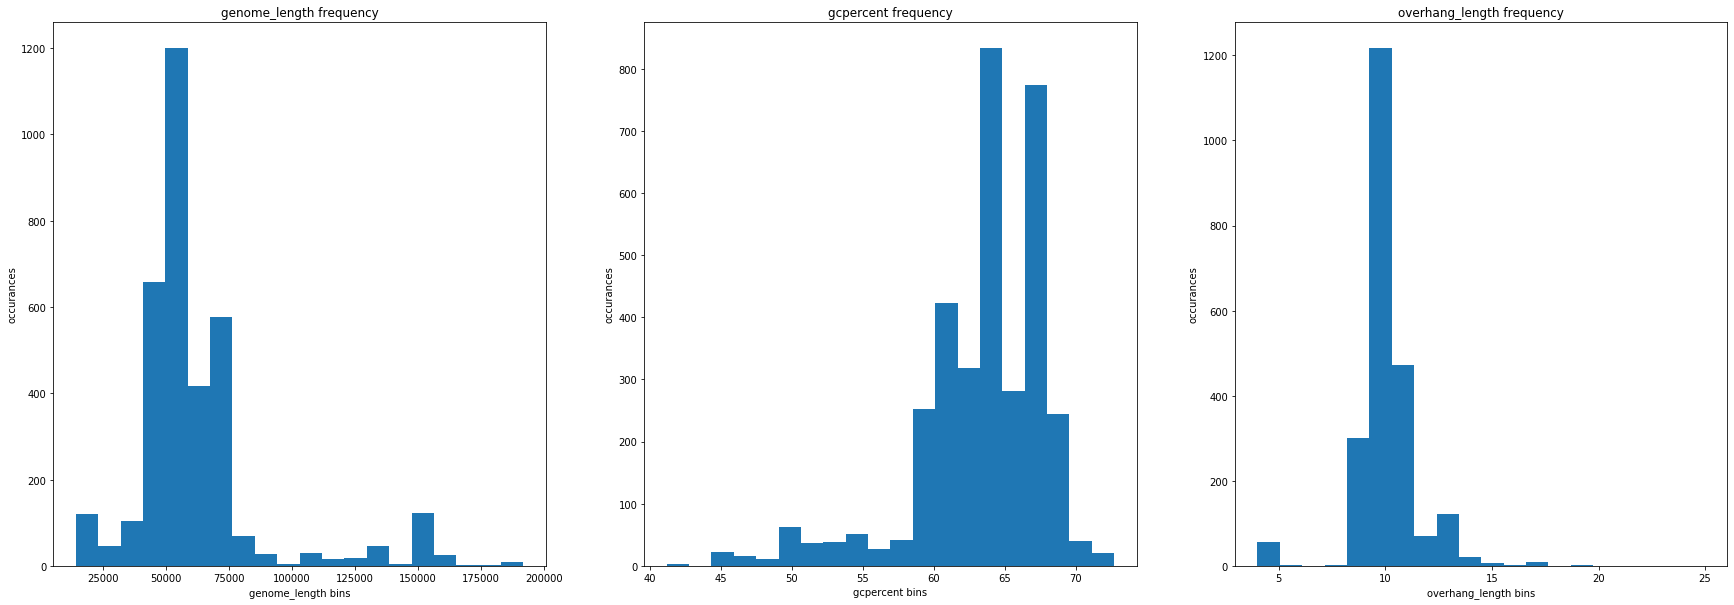

In [7]:
get_cohort_statistics(phages)

# Code to download some of the fasta files

In [16]:
import urllib.request
from Bio import SeqIO
import os
import re
!ls

Baee.fasta                   download_from_phagesdb.ipynb
data


In [12]:
!mkdir data

In [9]:
def download_url(url):
    urllib.request.urlretrieve(url, "data/{}".format(url.split("/")[-1]))

In [22]:
for ii, pg in enumerate(phages):
    if ii % 100 == 0:
        print("{}/{}".format(ii, len(phages)))
        
    if int(pg['genome_length']) < 100000:
        try:
            download_url(pg['fasta_file'])
        except:
            print("\tException on {}".format(pg['fasta_file']))

0/3499
100/3499
200/3499
300/3499
400/3499
500/3499
600/3499
700/3499
800/3499
900/3499
1000/3499
1100/3499
1200/3499
1300/3499
1400/3499
1500/3499
1600/3499
1700/3499
1800/3499
1900/3499
2000/3499
2100/3499
2200/3499
2300/3499
2400/3499
2500/3499
2600/3499
2700/3499
2800/3499
2900/3499
3000/3499
3100/3499
3200/3499
3300/3499
3400/3499


In [10]:
!ls data

20ES.fasta            Gardann.fasta         PSullivan.fasta
244.fasta             GardenSalsa.fasta     Pabst.fasta
32HC.fasta            GardenState.fasta     Pacc40.fasta
39HC.fasta            Gareth.fasta          PacerPaul.fasta
40AC.fasta            Gargoyle.fasta        PackMan.fasta
40BC.fasta            Gator.fasta           Padfoot.fasta
ABCat.fasta           Gattaca.fasta         Padpat.fasta
ABU.fasta             GaugeLDP.fasta        Paedore.fasta
ACFishhook.fasta      Gelo.fasta            PainterBoy.fasta
AFIS.fasta            GemG.fasta            Paito.fasta
AN3.fasta             Gemini.fasta          Pajaza.fasta
AN9.fasta             Gemma.fasta           Palestino.fasta
ANI8.fasta            GeneCoco.fasta        Panamaxus.fasta
ASerpRocky.fasta      GenevaB15.fasta       Panchino.fasta
ATCC29399BC.fasta     Gengar.fasta          PaoPu.fasta
ATCC29399BT.fasta     Geodirt.fasta         Paola.fasta
Aaronocolus.fasta     George.fasta          Papafritta.fasta
Abba.fasta

Dixon.fasta           Millski.fasta         Tredge.fasta
DizzyRudy.fasta       Milly.fasta           Tres.fasta
Djokovic.fasta        MillyPhilly.fasta     TreyKay.fasta
Dmitri.fasta          Min1.fasta            Tribby.fasta
DobbysSock.fasta      Mindy.fasta           Trike.fasta
DocB7.fasta           MinecraftSteve.fasta  Trine.fasta
DoctorDiddles.fasta   MiniLon.fasta         Tripl3t.fasta
Doddsville.fasta      MiniMac.fasta         TripleJ.fasta
DoesntMatter.fasta    Minima.fasta          Trireme.fasta
Dogfish.fasta         MinionDave.fasta      Triscuit.fasta
Doggs.fasta           Miniwave.fasta        Trixie.fasta
Dole.fasta            Minnie.fasta          Troje.fasta
DonSanchon.fasta      MintFen.fasta         Troll4.fasta
Dongwon.fasta         Miramae.fasta         Trooper.fasta
Donkeykong.fasta      Mischief19.fasta      Trouble.fasta
Donny.fasta           Misfit.fasta          Troy.fasta
Donovan.fasta         Misha28.fasta         TroyPia.fasta
Doom.fasta            Misomon

The data ended up being around 200 megabytes total, for most of phagesdb

In [11]:
fasta_sequences = SeqIO.parse(open("Baee.fasta"),'fasta')

for fasta in fasta_sequences:
    name, sequence = fasta.id, str(fasta.seq)
    print(name, ': sequence length =', len(sequence))

Mycobacterium : sequence length = 70270


In [33]:
fasta_name = []
num_genes = []
seq_length = []
gen_len_mean = []
gen_len_std = []
gen_len_min = []
gen_len_max = []
gen_len_median = []

gene_pattern = re.compile(r'ATG((?:[ACTG]{3})+?)(?:TAG|TAA|TGA)')


for fasta_file in os.listdir('data/'):
    fasta_sequences = SeqIO.parse(open('data/'+fasta_file),'fasta')
    
    seqs = []
    for fasta in fasta_sequences:
        name, sequence = fasta.id, str(fasta.seq)
        seqs.append(sequence)
#         print(name, ': sequence length =', len(sequence))
    if len(seqs) != 1:
        print("Error num seqs in fasta file {}".format(fasta_file))
        continue
        
    genes = gene_pattern.findall(seqs[0])
    len_genes = list(map(lambda x: len(x), genes))
    
    fasta_name.append(fasta_file.split('.')[0])
    num_genes.append(len(genes))
    seq_length.append(len(seqs[0]))
    gen_len_mean.append(statistics.mean(len_genes))
    gen_len_std.append(statistics.stdev(len_genes))
    gen_len_min.append(min(len_genes))
    gen_len_max.append(max(len_genes))
    gen_len_median.append(statistics.median(len_genes))

In [34]:
def plot_stats(stats):
    plt.figure(figsize=(10*len(stats), 10))

    for ii, stat in enumerate(stats):
        plt.subplot(1, len(stats), ii+1) 
        plt.title(stat[0]+" frequency")
        plt.xlabel(stat[0]+" bins")
        plt.ylabel("occurances")
        plt.hist(stat[1], bins = 20)
    


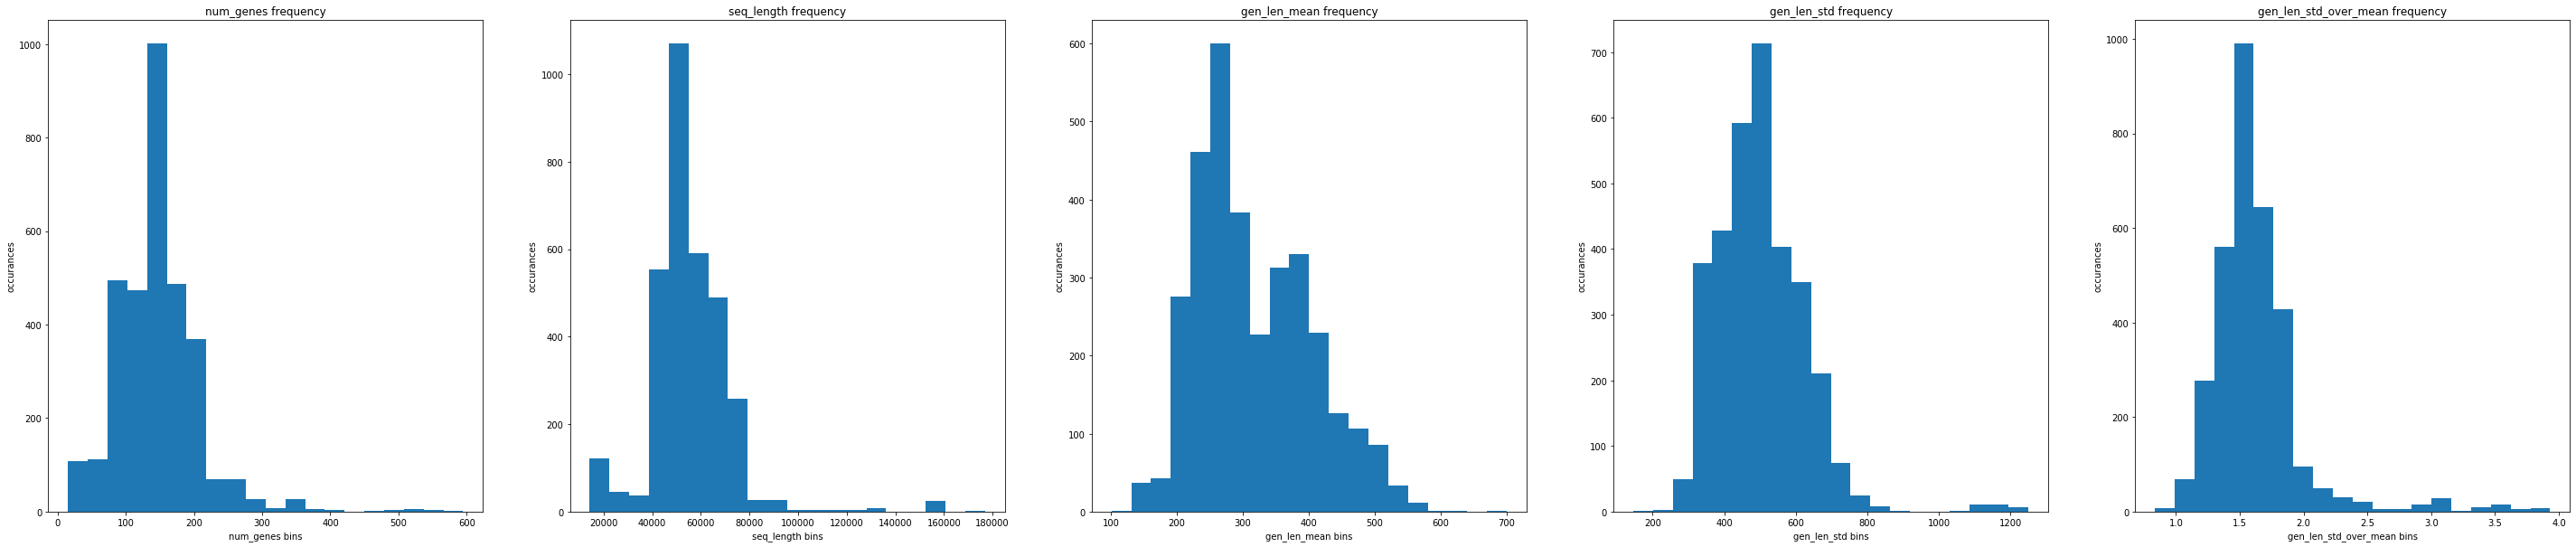

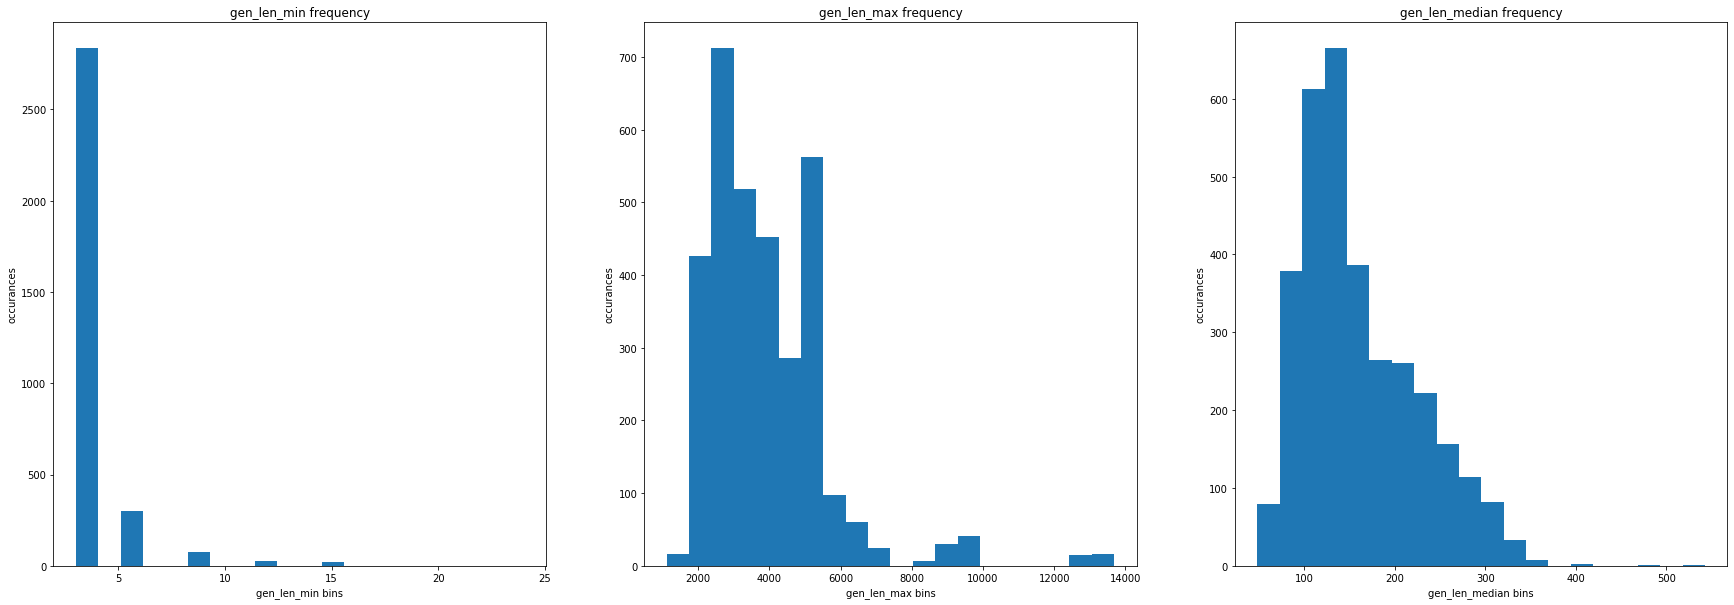

In [35]:
gen_len_std_over_mean = list(map(lambda x: x[0]/x[1], zip(gen_len_std, gen_len_mean)))
stats_1 = [('num_genes', num_genes), ('seq_length', seq_length), 
         ('gen_len_mean', gen_len_mean), ('gen_len_std', gen_len_std), 
         ('gen_len_std_over_mean', gen_len_std_over_mean)]

stats_2 = [('gen_len_min', gen_len_min), ('gen_len_max', gen_len_max), 
           ('gen_len_median', gen_len_median)]

plot_stats(stats_1)
plot_stats(stats_2)

Note: all of the above metrics are in number of neucleic acids, for example the sequence `ATCGA` has a length of 5